Introduction
============

This is interactive notebook regarding "Introduction to path planning". (Author: Björn Hein)

License is based on Creative Commons: Attribution-NonCommercial 4.0 International (CC BY-NC 4.0) (pls. check: http://creativecommons.org/licenses/by-nc/4.0/)

This notebook imports all discussed algorithms and does a comparison

**Attention**: This worksheet has external dependencies 

* to the files "InnoKonz2dEnv.py" or "InnoKonzShapelyEnv.py". These files contain simple 2D environments based on numpy arrays or the shapely library with an interface for the use as collision checking in the algorithms.
* to all modules like "**Algorithm**.py", which contains the corresponding algorithms 

Important links are:

* General Info: http://www.python.org
* Python tutorial http://www.python.org/doc/tut/
* NetworkX http://networkx.github.io/
* NumPy and SciPy Guide http://docs.scipy.org/
* Matplotlib gallery http://matplotlib.sourceforge.net/gallery.html


Remember that:

* you have to press ctrl-return or shift-return, to execute the code in the code sections, only then the variables are "generated" and can be used
* you can execute the whole notebook by Cell->runAll

Adding all planners
===========


In [2]:
import sys
sys.path.append("templates")
%load_ext autoreload
%autoreload 2

In [3]:
from IPPerfMonitor import IPPerfMonitor
import IPBasicPRM
import IPVISBasicPRM
import IPVisibilityPRM
import IPVISVisibilityPRM

import IPKClosestPRM # for visualization IKVISBasicPRM is used

#import IPLazyPRM
#import IPVISLazyPRM

import IPRRT
import IPRRTSimple
#import IPVISRRT

import IPAStar
import IPVISAStar

Set-up of the test scenario and the configuration for all planner
===================================

Following a procedure to compare all discussed planners are shown:

1. Configuration for every planner is defined
2. The configuration and the planner is stored in the variable setup, a Python dict()
3. the variable setup is then used to uniformly call the planning calls


In [4]:
plannerFactory = dict()

basicConfig = dict()
basicConfig["radius"] = 5
basicConfig["numNodes"] = 300
plannerFactory["basePRM"] = [IPBasicPRM.BasicPRM, basicConfig, IPVISBasicPRM.basicPRMVisualize]

basicConfig2 = dict()
basicConfig2["radius"] = 3
basicConfig2["numNodes"] = 300
#plannerFactory["basePRM2"] = [IPBasicPRM.BasicPRM, basicConfig2, IPVISBasicPRM.basicPRMVisualize]

visbilityConfig = dict()
visbilityConfig["ntry"] = 300
plannerFactory["visibilityPRM"] = [IPVisibilityPRM.VisPRM, visbilityConfig, IPVISVisibilityPRM.visibilityPRMVisualize]

kClosestConfig = dict()
kClosestConfig["k"] = 3
kClosestConfig["numNodes"] = 300
plannerFactory["kClosestPRM"] = [IPKClosestPRM.KClosestPRM, kClosestConfig, IPVISBasicPRM.basicPRMVisualize]

# lazyConfig = dict()
# lazyConfig["initialRoadmapSize"] = 5 
# lazyConfig["updateRoadmapSize"]  = 5 
# lazyConfig["kNearest"] = 5 
# plannerFactory["lazyPRM"] = [IPLazyPRM.LazyPRM, lazyConfig, IPVISLazyPRM.lazyPRMVisualize]

astarConfig = dict()
astarConfig["heuristic"] = 'euclidean' 
astarConfig["w"]  = 0.5
#plannerFactory["astar"] = [IPAStar.AStar, astarConfig, IPVISAStar.aStarVisualize]

rrtConfig = dict()
rrtConfig["numberOfGeneratedNodes"] = 300 
rrtConfig["testGoalAfterNumberOfNodes"]  = 10
plannerFactory["RRT"] = [IPRRT.RRT, rrtConfig, IPVISBasicPRM.basicPRMVisualize]

rrtSimpleConfig = dict()
rrtSimpleConfig["numberOfGeneratedNodes"] = 300 
rrtSimpleConfig["testGoalAfterNumberOfNodes"]  = 10
plannerFactory["simpleRRT"] = [IPRRTSimple.RRTSimple, rrtSimpleConfig, IPVISBasicPRM.basicPRMVisualize]

In [5]:
class ResultCollection (object):
    
    def __init__(self, plannerFactoryName, planner, benchmark, solution, perfDataFrame):
        self.plannerFactoryName = plannerFactoryName
        self.planner = planner
        self.benchmark = benchmark
        self.solution = solution
        self.perfDataFrame = perfDataFrame

In [6]:
import IPTestSuite
import importlib

In [7]:
importlib.reload(IPTestSuite)

<module 'IPTestSuite' from 'E:\\HS Karlsruhe\\Masters\\Semester 1\\Roboterprogrammierung\\RP-Exam\\RoboterProgrammierungExam\\IPTestSuite.py'>

In [8]:
for benchmark in IPTestSuite.benchList:
    print(benchmark.name)

Trap
Bottleneck
Fat bottleneck
Spirals
Entrance
Entrances
KIT
Inside
SSL
Ring
Hemispheres
Hammerhead
Zigzag
Spiral
medium
medium2
L-square
Teeth
Gearshift
Squares_easy
Zigzag_medium
Zigzag_hard
Japan
Haystack
HairPerson


In [9]:
resultList = list()

for key,producer in list(plannerFactory.items()):
    print(key, producer)
    for benchmark in IPTestSuite.benchList[0:3]:
        print ("Planning: " + key + " - " + benchmark.name)
        #planner = IPBasicPRM.BasicPRM(benchmark.collisionChecker)
        planner = producer[0](benchmark.collisionChecker)
        IPPerfMonitor.clearData()
        #try:
            
        resultList.append(ResultCollection(key,
                                           planner, 
                                           benchmark, 
                                           planner.planPath(benchmark.startList,benchmark.goalList,producer[1]),
                                           IPPerfMonitor.dataFrame()
                                          ),
                        )
        #except Exception as e:
        #    throw e
        #    print ("PLANNING ERROR ! PLANNING ERROR ! PLANNING ERROR ")
        #    pass
            



basePRM [<class 'IPBasicPRM.BasicPRM'>, {'radius': 5, 'numNodes': 300}, <function basicPRMVisualize at 0x000001DD5ED8C5E0>]
Planning: basePRM - Trap
Planning: basePRM - Bottleneck
Planning: basePRM - Fat bottleneck
visibilityPRM [<class 'IPVisibilityPRM.VisPRM'>, {'ntry': 300}, <function visibilityPRMVisualize at 0x000001DD6D287670>]
Planning: visibilityPRM - Trap
Planning: visibilityPRM - Bottleneck
Planning: visibilityPRM - Fat bottleneck
kClosestPRM [<class 'IPKClosestPRM.KClosestPRM'>, {'k': 3, 'numNodes': 300}, <function basicPRMVisualize at 0x000001DD5ED8C5E0>]
Planning: kClosestPRM - Trap
Planning: kClosestPRM - Bottleneck
Planning: kClosestPRM - Fat bottleneck
RRT [<class 'IPRRT.RRT'>, {'numberOfGeneratedNodes': 300, 'testGoalAfterNumberOfNodes': 10}, <function basicPRMVisualize at 0x000001DD5ED8C5E0>]
Planning: RRT - Trap
Planning: RRT - Bottleneck
Planning: RRT - Fat bottleneck
simpleRRT [<class 'IPRRTSimple.RRTSimple'>, {'numberOfGeneratedNodes': 300, 'testGoalAfterNumberOfN

In [10]:
print(plannerFactory.items())

dict_items([('basePRM', [<class 'IPBasicPRM.BasicPRM'>, {'radius': 5, 'numNodes': 300}, <function basicPRMVisualize at 0x000001DD5ED8C5E0>]), ('visibilityPRM', [<class 'IPVisibilityPRM.VisPRM'>, {'ntry': 300}, <function visibilityPRMVisualize at 0x000001DD6D287670>]), ('kClosestPRM', [<class 'IPKClosestPRM.KClosestPRM'>, {'k': 3, 'numNodes': 300}, <function basicPRMVisualize at 0x000001DD5ED8C5E0>]), ('RRT', [<class 'IPRRT.RRT'>, {'numberOfGeneratedNodes': 300, 'testGoalAfterNumberOfNodes': 10}, <function basicPRMVisualize at 0x000001DD5ED8C5E0>]), ('simpleRRT', [<class 'IPRRTSimple.RRTSimple'>, {'numberOfGeneratedNodes': 300, 'testGoalAfterNumberOfNodes': 10}, <function basicPRMVisualize at 0x000001DD5ED8C5E0>])])


D:\Program Files\Python39\lib\site-packages\descartes\patch.py:63: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  concatenate([asarray(t.exterior)[:, :2]] +


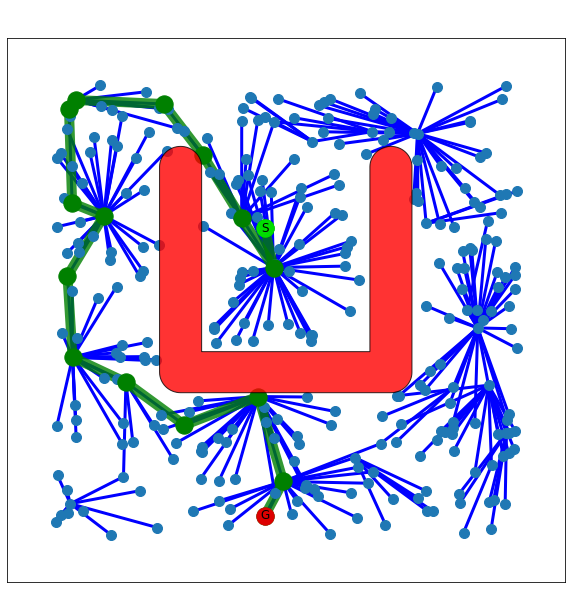

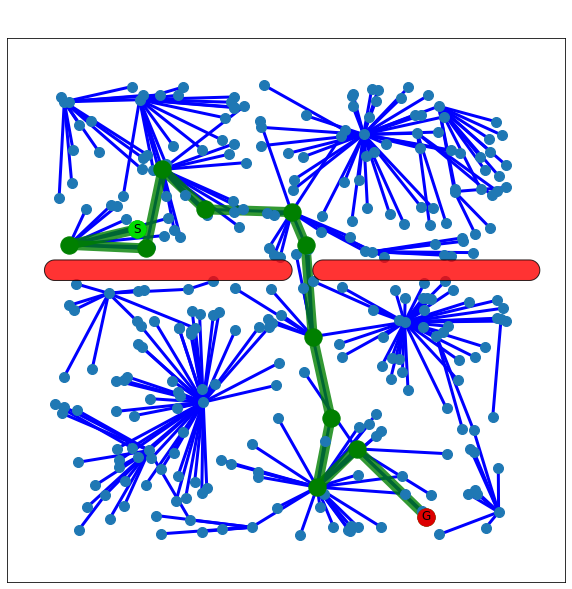

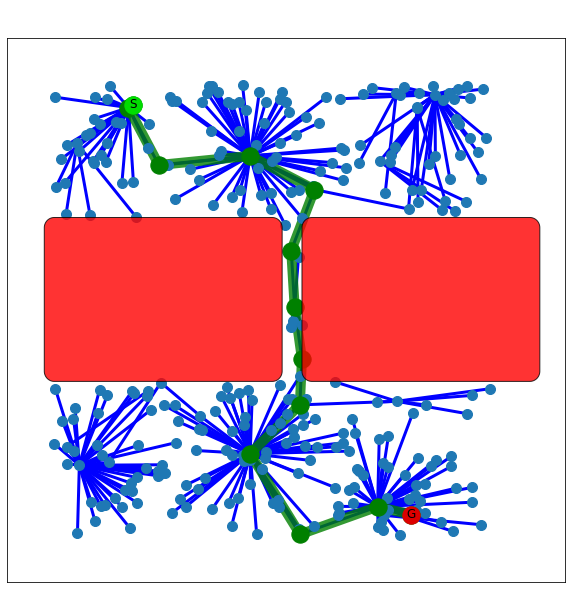

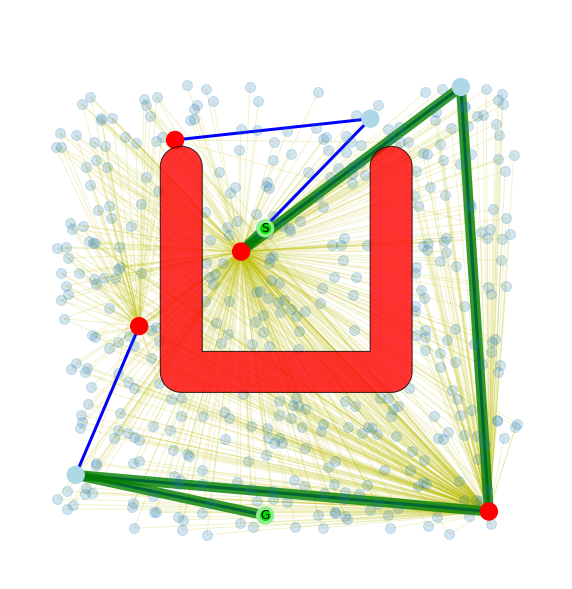

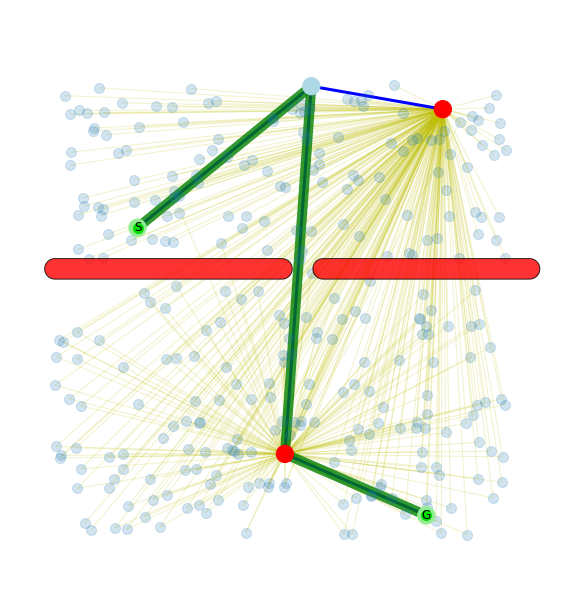

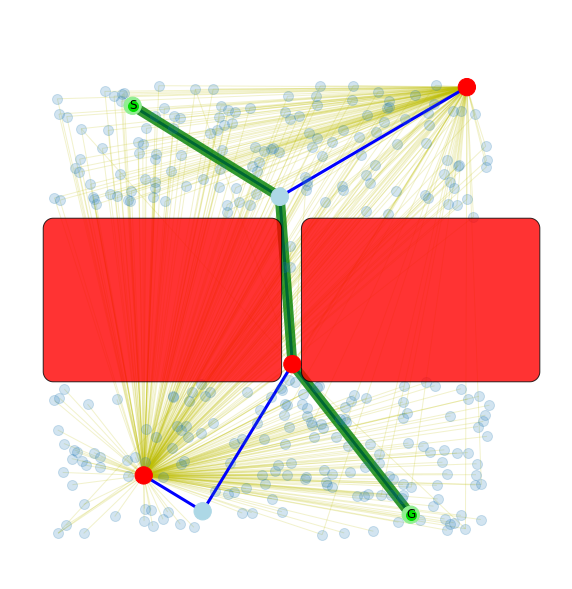

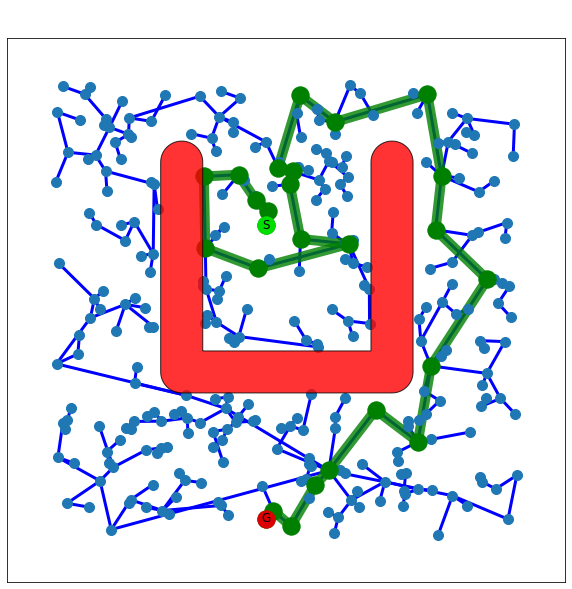

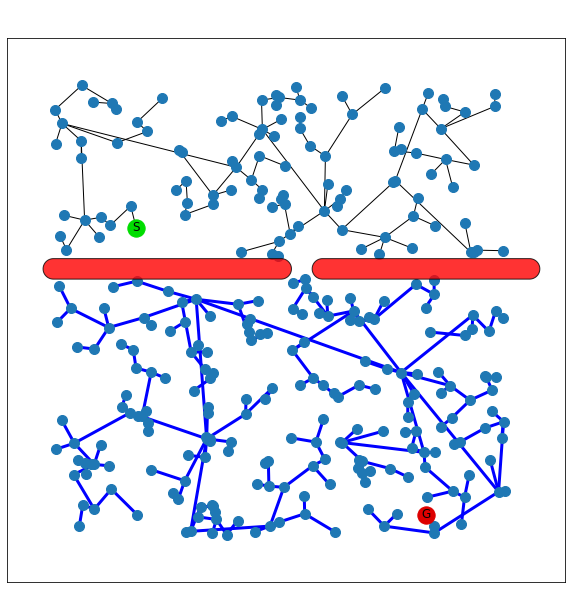

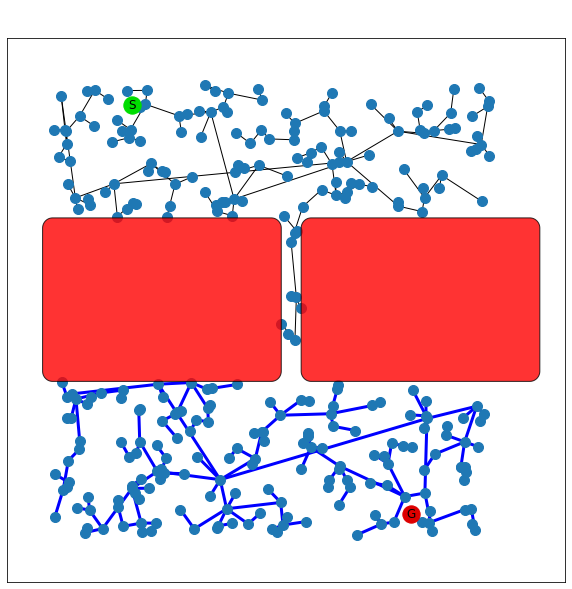

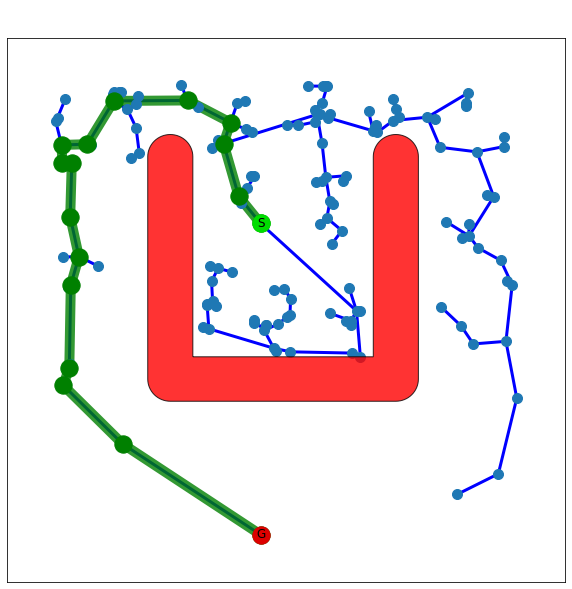

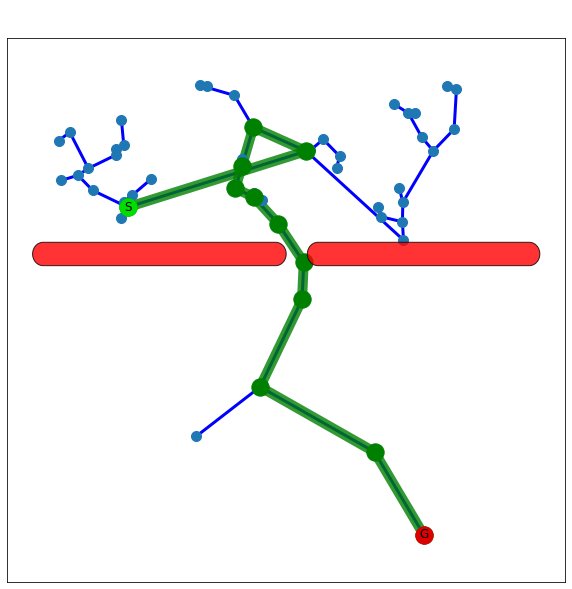

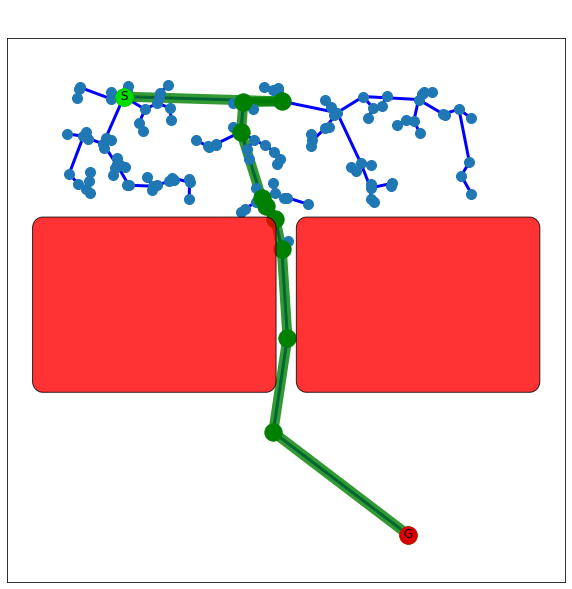

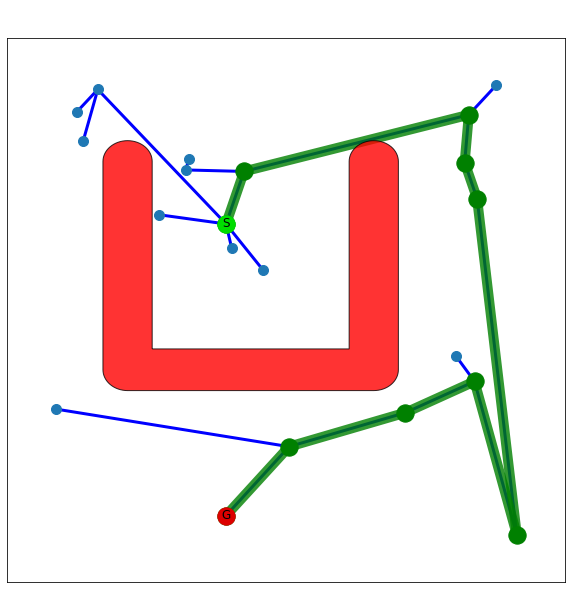

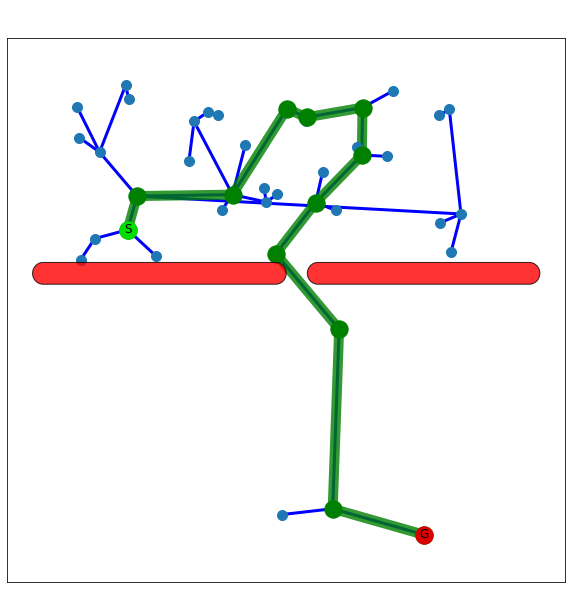

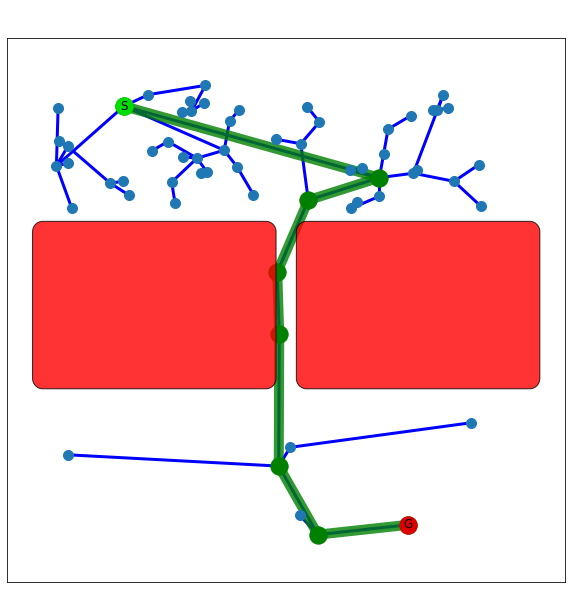

In [11]:
import matplotlib.pyplot as plt

for result in resultList:
    
    fig_local = plt.figure(figsize=(10,10))
    ax = fig_local.add_subplot(1,1,1)
    title = result.plannerFactoryName + " - " + result.benchmark.name
    if result.solution == []:
        title += " (No path found!)"
    title += "\n Assumed complexity level " + str(result.benchmark.level)
    ax.set_title(title, color='w')
    try:
        #IPVISBasicsPRM.basicPRMVisualize(result.planner, result.solution, ax=ax, nodeSize=100))
        plannerFactory[result.plannerFactoryName][2](result.planner, result.solution, ax=ax, nodeSize=100)
    except:
        pass
    

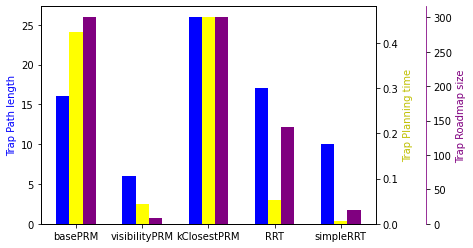

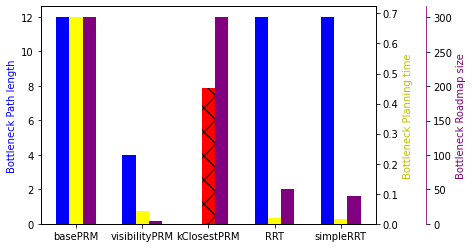

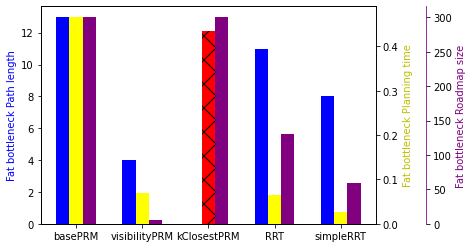

In [12]:
import numpy as np
for bench in IPTestSuite.benchList[0:3]:
    title = bench.name
    pathLength = dict()
    planningTime = dict()
    roadmapSize  = dict()
    
    for result in resultList:
        if result.benchmark.name == bench.name:
            #print result.benchmark.name  + " - " +  result.plannerFactoryName, len(result.solution)
            pathLength[result.plannerFactoryName] = len(result.solution)
            planningTime[result.plannerFactoryName] = result.perfDataFrame.groupby(["name"]).sum()["time"]["planPath"]
            roadmapSize[result.plannerFactoryName] = result.planner.graph.size()
    
    fig, ax = plt.subplots()
    
    width = 0.2
    
    ax.bar(np.arange(len(pathLength.keys())), pathLength.values(),width, color="blue")
    ax.set_ylabel(title + " Path length", color="blue")
    ax.set_xticks(np.arange(len(pathLength.keys())) + width)
    ax.set_xticklabels(pathLength.keys())

    ax2 = ax.twinx()
    bar = ax2.bar(np.arange(len(pathLength.keys()))+width, planningTime.values(),width, color="red")
    ax2.set_ylabel(title + " Planning time", color="y")

    # Add coloring and patterns on axis two
    hatches = ['x' if length==0 else '' for length in pathLength.values()]
    color   = ['red' if length==0 else 'yellow' for length in pathLength.values()]
    for i,thisbar in enumerate(bar.patches):
        thisbar.set_facecolor(color[i])
        thisbar.set_hatch(hatches[i])

    # Multiple axes 
    ax3 = ax.twinx()
    ax3.bar(np.arange(len(pathLength.keys()))+2*width, roadmapSize.values(),width, color="purple")
    ax3.set_ylabel(title + " Roadmap size",  color="purple")
    ax3.spines['right'].set_position(('axes', 1.15))
    ax3.spines['right'].set_color("purple")
    

    
        
    

In [13]:
result.perfDataFrame.groupby(["name"]).sum()["time"]

name
_getRandomFreePosition    0.003981
lineInCollision           0.007965
planPath                  0.027000
pointInCollision          0.004481
Name: time, dtype: float64

Step: 1
total steps: 1
n step: 1
n: 0
k: 3
basePRM
Initial Path: ['start', 2, 8, 36, 45, 16, 54, 26, 14, 32, 1, 9, 25, 3, 12, 'goal']
i: 4
length of path: 16
k_prev: 2
Centered: 45
k_next: 26
Line collides, No change
total steps: 2
n step: 2
n: 0
k: 2
basePRM
Initial Path: ['start', 2, 8, 36, 45, 16, 54, 26, 14, 32, 1, 9, 25, 3, 12, 'goal']
i: 4
length of path: 16
k_prev: 8
Centered: 45
k_next: 54
Line collides, No change
total steps: 3
n step: 3
n: 0
k: 1
basePRM
Initial Path: ['start', 2, 8, 36, 45, 16, 54, 26, 14, 32, 1, 9, 25, 3, 12, 'goal']
i: 4
length of path: 16
k_prev: 36
Centered: 45
k_next: 16
Line collides, No change
DelTree centered on list item 4, node: 45
graph nodes: [32, 1, 2, 3, 36, 8, 9, 'goal', 12, 45, 14, 'start', 16, 54, 25, 26]
54
Adding nodes: 55 and 56
deleting center node: 45
DelTree successful
del_tree path creation, new path: ['start', 2, 8, 36, 55, 56, 16, 54, 26, 14, 32, 1, 9, 25, 3, 12, 'goal']
total steps: 4
n step: 1
n: 1
k: 3
basePRM
Initial Path: ['sta

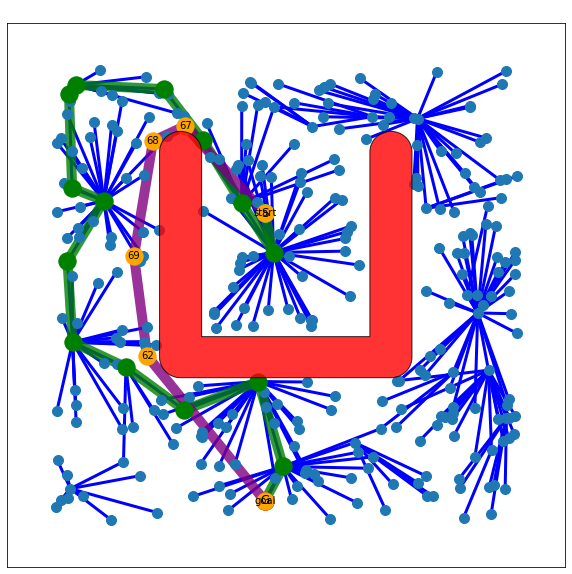

Step: 2
total steps: 1
n step: 1
n: 0
k: 3
basePRM
Initial Path: ['start', 12, 40, 16, 45, 18, 69, 9, 8, 1, 5, 'goal']
i: 4
length of path: 12
k_prev: 12
Centered: 45
k_next: 9
Line collides, No change
total steps: 2
n step: 2
n: 0
k: 2
basePRM
Initial Path: ['start', 12, 40, 16, 45, 18, 69, 9, 8, 1, 5, 'goal']
i: 4
length of path: 12
k_prev: 40
Centered: 45
k_next: 69
Deleted Nodes: [16, 45, 18]
new path creation, new path: ['start', 12, 40, 69, 9, 8, 1, 5, 'goal']
breaking!
total steps: 3
n step: 1
n: 1
k: 3
basePRM
Initial Path: ['start', 12, 40, 69, 9, 8, 1, 5, 'goal']
i: 2
length of path: 9
k_prev: start
Centered: 40
k_next: 8
Line collides, No change
total steps: 4
n step: 2
n: 1
k: 2
basePRM
Initial Path: ['start', 12, 40, 69, 9, 8, 1, 5, 'goal']
i: 2
length of path: 9
k_prev: start
Centered: 40
k_next: 9
Line collides, No change
total steps: 5
n step: 3
n: 1
k: 1
basePRM
Initial Path: ['start', 12, 40, 69, 9, 8, 1, 5, 'goal']
i: 2
length of path: 9
k_prev: 12
Centered: 40
k_nex

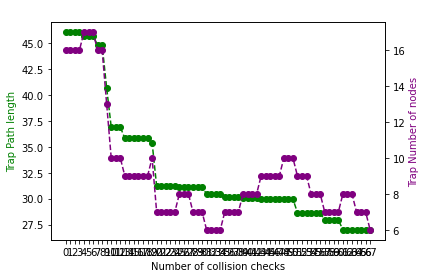

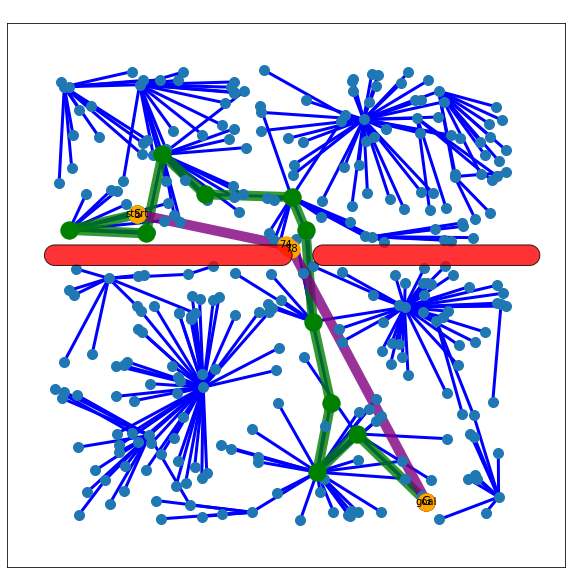

Step: 3
total steps: 1
n step: 1
n: 0
k: 3
basePRM
Initial Path: ['start', 15, 64, 2, 17, 122, 41, 123, 82, 5, 14, 7, 'goal']
i: 1
length of path: 13
k_prev: start
Centered: 15
k_next: 17
Deleted Nodes: [15, 64, 2]
new path creation, new path: ['start', 17, 122, 41, 123, 82, 5, 14, 7, 'goal']
breaking!
total steps: 2
n step: 1
n: 1
k: 3
basePRM
Initial Path: ['start', 17, 122, 41, 123, 82, 5, 14, 7, 'goal']
i: 6
length of path: 10
k_prev: 41
Centered: 5
k_next: goal
Line collides, No change
total steps: 3
n step: 2
n: 1
k: 2
basePRM
Initial Path: ['start', 17, 122, 41, 123, 82, 5, 14, 7, 'goal']
i: 6
length of path: 10
k_prev: 123
Centered: 5
k_next: 7
Line collides, No change
total steps: 4
n step: 3
n: 1
k: 1
basePRM
Initial Path: ['start', 17, 122, 41, 123, 82, 5, 14, 7, 'goal']
i: 6
length of path: 10
k_prev: 82
Centered: 5
k_next: 14
Deleted Nodes: [5]
new path creation, new path: ['start', 17, 122, 41, 123, 82, 14, 7, 'goal']
total steps: 5
n step: 1
n: 2
k: 3
basePRM
Initial Pat

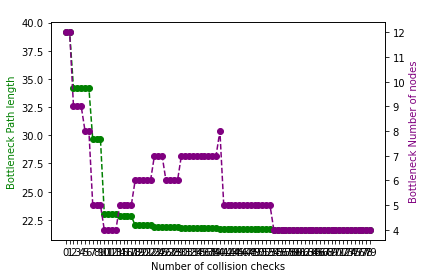

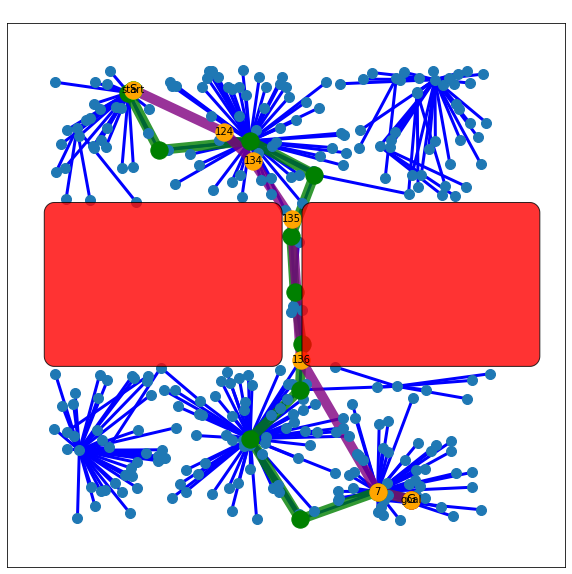

Step: 4
total steps: 1
n step: 1
n: 0
k: 3
visibilityPRM
Initial Path: ['start', 0, 7, 1, 12, 'goal']
i: 4
length of path: 6
k_prev: 0
Centered: 12
k_next: goal
Line collides, No change
total steps: 2
n step: 2
n: 0
k: 2
visibilityPRM
Initial Path: ['start', 0, 7, 1, 12, 'goal']
i: 4
length of path: 6
k_prev: 7
Centered: 12
k_next: goal
Line collides, No change
total steps: 3
n step: 3
n: 0
k: 1
visibilityPRM
Initial Path: ['start', 0, 7, 1, 12, 'goal']
i: 4
length of path: 6
k_prev: 1
Centered: 12
k_next: goal
Deleted Nodes: [12]
new path creation, new path: ['start', 0, 7, 1, 'goal']
total steps: 4
n step: 1
n: 1
k: 3
visibilityPRM
Initial Path: ['start', 0, 7, 1, 'goal']
i: 1
length of path: 5
k_prev: start
Centered: 0
k_next: goal
Line collides, No change
total steps: 5
n step: 2
n: 1
k: 2
visibilityPRM
Initial Path: ['start', 0, 7, 1, 'goal']
i: 1
length of path: 5
k_prev: start
Centered: 0
k_next: 1
Line collides, No change
total steps: 6
n step: 3
n: 1
k: 1
visibilityPRM
Initial

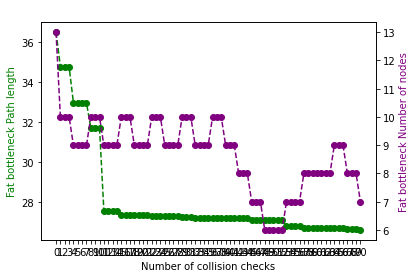

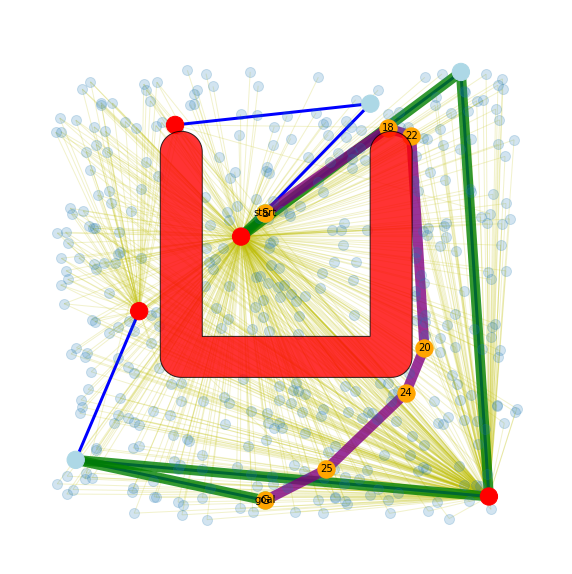

Step: 5
total steps: 1
n step: 1
n: 0
k: 3
visibilityPRM
Initial Path: ['start', 10, 1, 'goal']
i: 2
length of path: 4
k_prev: start
Centered: 1
k_next: goal
Line collides, No change
total steps: 2
n step: 2
n: 0
k: 2
visibilityPRM
Initial Path: ['start', 10, 1, 'goal']
i: 2
length of path: 4
k_prev: start
Centered: 1
k_next: goal
Line collides, No change
total steps: 3
n step: 3
n: 0
k: 1
visibilityPRM
Initial Path: ['start', 10, 1, 'goal']
i: 2
length of path: 4
k_prev: 10
Centered: 1
k_next: goal
Line collides, No change
DelTree centered on list item 2, node: 1
graph nodes: [1, 10, 'start', 'goal']
10
Adding nodes: 11 and 12
deleting center node: 1
DelTree successful
del_tree path creation, new path: ['start', 10, 11, 12, 'goal']
total steps: 4
n step: 1
n: 1
k: 3
visibilityPRM
Initial Path: ['start', 10, 11, 12, 'goal']
i: 1
length of path: 5
k_prev: start
Centered: 10
k_next: goal
Line collides, No change
total steps: 5
n step: 2
n: 1
k: 2
visibilityPRM
Initial Path: ['start', 10,

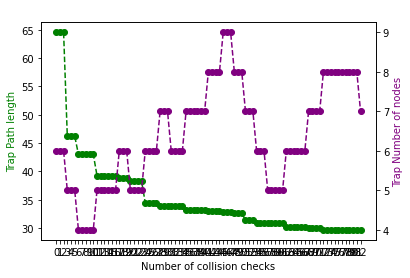

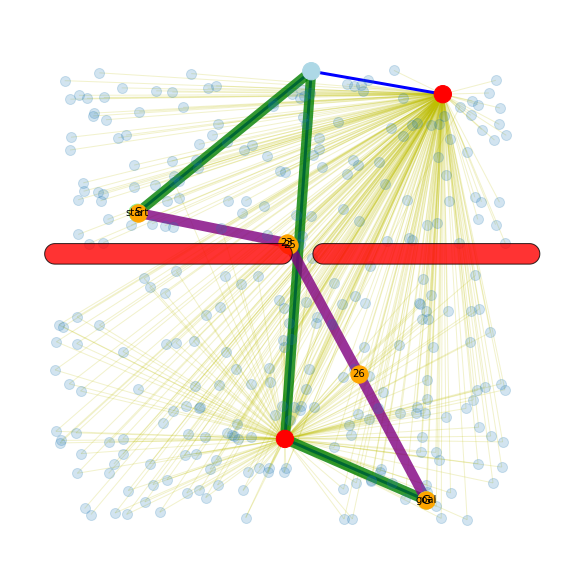

Step: 6
total steps: 1
n step: 1
n: 0
k: 3
visibilityPRM
Initial Path: ['start', 27, 17, 'goal']
i: 2
length of path: 4
k_prev: start
Centered: 17
k_next: goal
Line collides, No change
total steps: 2
n step: 2
n: 0
k: 2
visibilityPRM
Initial Path: ['start', 27, 17, 'goal']
i: 2
length of path: 4
k_prev: start
Centered: 17
k_next: goal
Line collides, No change
total steps: 3
n step: 3
n: 0
k: 1
visibilityPRM
Initial Path: ['start', 27, 17, 'goal']
i: 2
length of path: 4
k_prev: 27
Centered: 17
k_next: goal
Line collides, No change
DelTree centered on list item 2, node: 17
DelTree line collides
DelTree line collides
DelTree line collides
graph nodes: [17, 27, 'start', 'goal']
27
Adding nodes: 28 and 29
deleting center node: 17
DelTree successful
del_tree path creation, new path: ['start', 27, 28, 29, 'goal']
total steps: 4
n step: 1
n: 1
k: 3
visibilityPRM
Initial Path: ['start', 27, 28, 29, 'goal']
i: 1
length of path: 5
k_prev: start
Centered: 27
k_next: goal
Line collides, No change
t

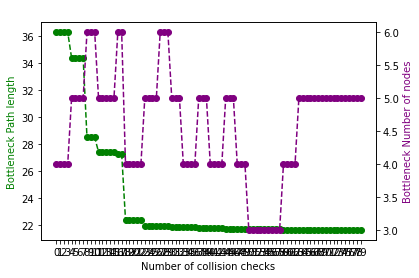

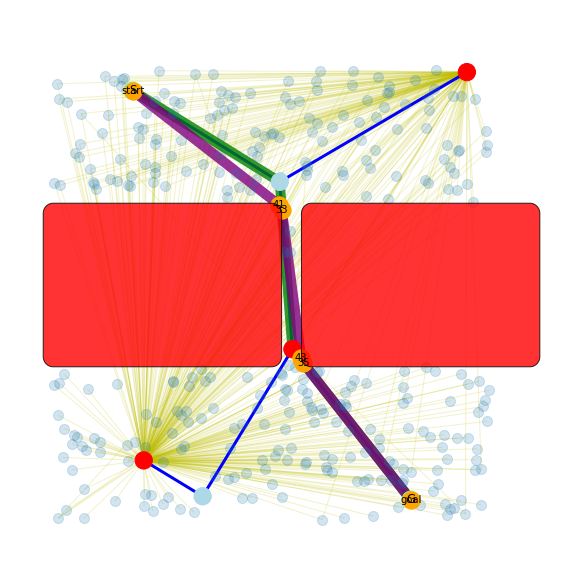

Step: 7
total steps: 1
n step: 1
n: 0
k: 3
kClosestPRM
Initial Path: ['start', 297, 68, 35, 14, 5, 3, 2, 6, 8, 15, 30, 38, 54, 88, 22, 11, 28, 12, 9, 7, 1, 37, 67, 151, 'goal']
i: 21
length of path: 26
k_prev: 12
Centered: 1
k_next: 151
Deleted Nodes: [9, 7, 1, 37, 67]
new path creation, new path: ['start', 297, 68, 35, 14, 5, 3, 2, 6, 8, 15, 30, 38, 54, 88, 22, 11, 28, 12, 151, 'goal']
breaking!
total steps: 2
n step: 1
n: 1
k: 3
kClosestPRM
Initial Path: ['start', 297, 68, 35, 14, 5, 3, 2, 6, 8, 15, 30, 38, 54, 88, 22, 11, 28, 12, 151, 'goal']
i: 8
length of path: 21
k_prev: 5
Centered: 6
k_next: 30
Deleted Nodes: [3, 2, 6, 8, 15]
new path creation, new path: ['start', 297, 68, 35, 14, 5, 30, 38, 54, 88, 22, 11, 28, 12, 151, 'goal']
breaking!
total steps: 3
n step: 1
n: 2
k: 3
kClosestPRM
Initial Path: ['start', 297, 68, 35, 14, 5, 30, 38, 54, 88, 22, 11, 28, 12, 151, 'goal']
i: 11
length of path: 16
k_prev: 54
Centered: 11
k_next: 151
Line collides, No change
total steps: 4
n step: 

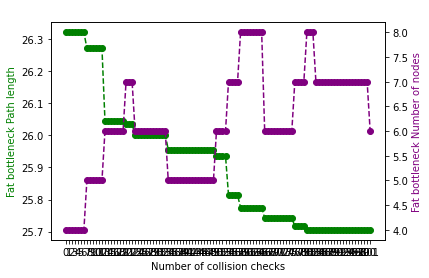

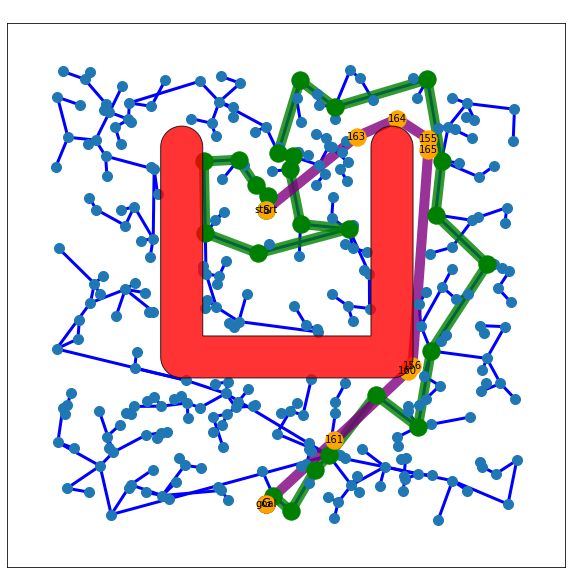

Step: 8
Step: 9
Step: 10
total steps: 1
n step: 1
n: 0
k: 3
RRT
Initial Path: ['start', 3, 4, 11, 16, 18, 30, 58, 59, 79, 102, 103, 104, 109, 131, 133, 'goal']
i: 3
length of path: 17
k_prev: start
Centered: 11
k_next: 30
Line collides, No change
total steps: 2
n step: 2
n: 0
k: 2
RRT
Initial Path: ['start', 3, 4, 11, 16, 18, 30, 58, 59, 79, 102, 103, 104, 109, 131, 133, 'goal']
i: 3
length of path: 17
k_prev: 3
Centered: 11
k_next: 18
Line collides, No change
total steps: 3
n step: 3
n: 0
k: 1
RRT
Initial Path: ['start', 3, 4, 11, 16, 18, 30, 58, 59, 79, 102, 103, 104, 109, 131, 133, 'goal']
i: 3
length of path: 17
k_prev: 4
Centered: 11
k_next: 16
Deleted Nodes: [11]
new path creation, new path: ['start', 3, 4, 16, 18, 30, 58, 59, 79, 102, 103, 104, 109, 131, 133, 'goal']
total steps: 4
n step: 1
n: 1
k: 3
RRT
Initial Path: ['start', 3, 4, 16, 18, 30, 58, 59, 79, 102, 103, 104, 109, 131, 133, 'goal']
i: 4
length of path: 16
k_prev: 3
Centered: 18
k_next: 59
Line collides, No change
t

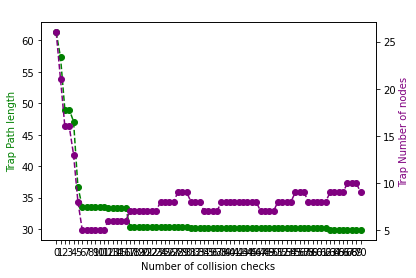

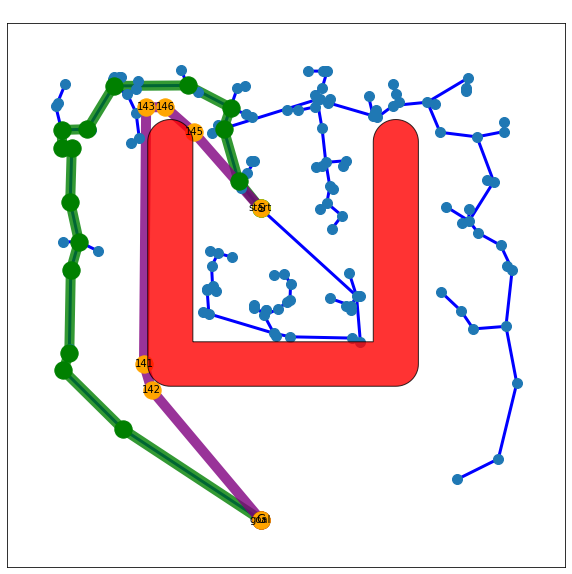

Step: 11
total steps: 1
n step: 1
n: 0
k: 3
RRT
Initial Path: ['start', 3, 4, 5, 7, 11, 25, 42, 44, 46, 47, 'goal']
i: 7
length of path: 12
k_prev: 7
Centered: 42
k_next: 47
Line collides, No change
total steps: 2
n step: 2
n: 0
k: 2
RRT
Initial Path: ['start', 3, 4, 5, 7, 11, 25, 42, 44, 46, 47, 'goal']
i: 7
length of path: 12
k_prev: 11
Centered: 42
k_next: 46
Line collides, No change
total steps: 3
n step: 3
n: 0
k: 1
RRT
Initial Path: ['start', 3, 4, 5, 7, 11, 25, 42, 44, 46, 47, 'goal']
i: 7
length of path: 12
k_prev: 25
Centered: 42
k_next: 44
Deleted Nodes: [42]
new path creation, new path: ['start', 3, 4, 5, 7, 11, 25, 44, 46, 47, 'goal']
total steps: 4
n step: 1
n: 1
k: 3
RRT
Initial Path: ['start', 3, 4, 5, 7, 11, 25, 44, 46, 47, 'goal']
i: 1
length of path: 11
k_prev: start
Centered: 3
k_next: 7
Deleted Nodes: [3, 4, 5]
new path creation, new path: ['start', 7, 11, 25, 44, 46, 47, 'goal']
breaking!
total steps: 5
n step: 1
n: 2
k: 3
RRT
Initial Path: ['start', 7, 11, 25, 44,

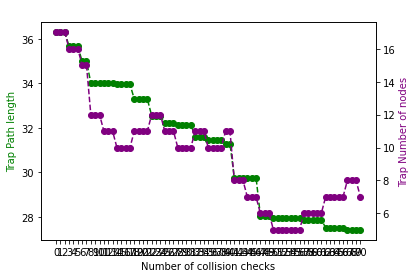

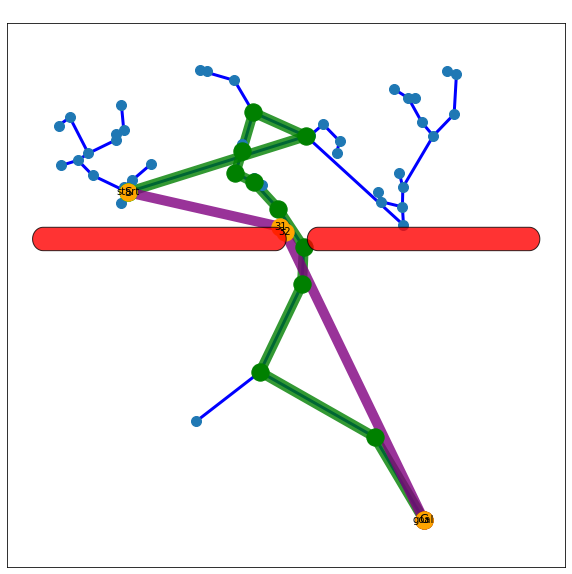

Step: 12
total steps: 1
n step: 1
n: 0
k: 3
RRT
Initial Path: ['start', 1, 3, 5, 7, 94, 118, 119, 128, 129, 'goal']
i: 2
length of path: 11
k_prev: start
Centered: 3
k_next: 94
Deleted Nodes: [1, 3, 5, 7]
new path creation, new path: ['start', 94, 118, 119, 128, 129, 'goal']
breaking!
total steps: 2
n step: 1
n: 1
k: 3
RRT
Initial Path: ['start', 94, 118, 119, 128, 129, 'goal']
i: 3
length of path: 7
k_prev: start
Centered: 119
k_next: goal
Line collides, No change
total steps: 3
n step: 2
n: 1
k: 2
RRT
Initial Path: ['start', 94, 118, 119, 128, 129, 'goal']
i: 3
length of path: 7
k_prev: 94
Centered: 119
k_next: 129
Line collides, No change
total steps: 4
n step: 3
n: 1
k: 1
RRT
Initial Path: ['start', 94, 118, 119, 128, 129, 'goal']
i: 3
length of path: 7
k_prev: 118
Centered: 119
k_next: 128
Deleted Nodes: [119]
new path creation, new path: ['start', 94, 118, 128, 129, 'goal']
total steps: 5
n step: 1
n: 2
k: 3
RRT
Initial Path: ['start', 94, 118, 128, 129, 'goal']
i: 1
length of pa

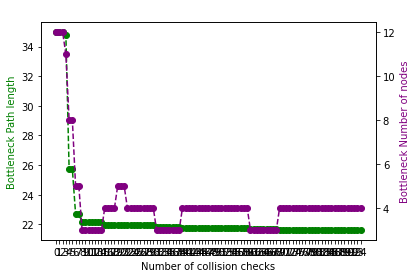

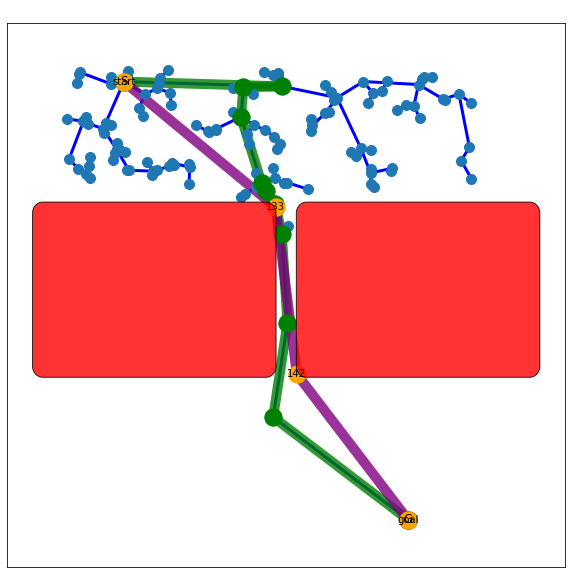

Step: 13
total steps: 1
n step: 1
n: 0
k: 3
simpleRRT
Initial Path: ['start', 4, 7, 8, 10, 13, 14, 15, 18, 'goal']
i: 2
length of path: 10
k_prev: start
Centered: 7
k_next: 13
Line collides, No change
total steps: 2
n step: 2
n: 0
k: 2
simpleRRT
Initial Path: ['start', 4, 7, 8, 10, 13, 14, 15, 18, 'goal']
i: 2
length of path: 10
k_prev: start
Centered: 7
k_next: 10
Line collides, No change
total steps: 3
n step: 3
n: 0
k: 1
simpleRRT
Initial Path: ['start', 4, 7, 8, 10, 13, 14, 15, 18, 'goal']
i: 2
length of path: 10
k_prev: 4
Centered: 7
k_next: 8
Line collides, No change
DelTree centered on list item 2, node: 7
DelTree line collides
graph nodes: [4, 7, 8, 'goal', 10, 13, 14, 'start', 15, 18]
18
Adding nodes: 19 and 20
deleting center node: 7
DelTree successful
del_tree path creation, new path: ['start', 4, 19, 20, 8, 10, 13, 14, 15, 18, 'goal']
total steps: 4
n step: 1
n: 1
k: 3
simpleRRT
Initial Path: ['start', 4, 19, 20, 8, 10, 13, 14, 15, 18, 'goal']
i: 4
length of path: 11
k_prev

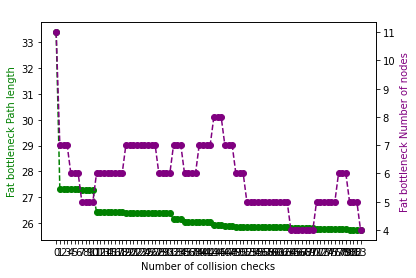

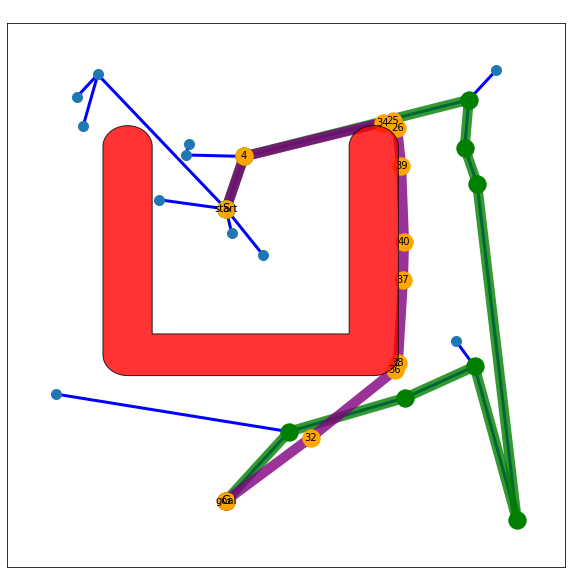

Step: 14
total steps: 1
n step: 1
n: 0
k: 3
simpleRRT
Initial Path: ['start', 1, 3, 5, 9, 10, 11, 12, 17, 32, 37, 'goal']
i: 9
length of path: 12
k_prev: 11
Centered: 32
k_next: goal
Line collides, No change
total steps: 2
n step: 2
n: 0
k: 2
simpleRRT
Initial Path: ['start', 1, 3, 5, 9, 10, 11, 12, 17, 32, 37, 'goal']
i: 9
length of path: 12
k_prev: 12
Centered: 32
k_next: goal
Line collides, No change
total steps: 3
n step: 3
n: 0
k: 1
simpleRRT
Initial Path: ['start', 1, 3, 5, 9, 10, 11, 12, 17, 32, 37, 'goal']
i: 9
length of path: 12
k_prev: 17
Centered: 32
k_next: 37
Line collides, No change
DelTree centered on list item 9, node: 32
graph nodes: [32, 1, 3, 5, 37, 9, 10, 11, 12, 'goal', 'start', 17]
37
Adding nodes: 38 and 39
deleting center node: 32
DelTree successful
del_tree path creation, new path: ['start', 1, 3, 5, 9, 10, 11, 12, 17, 38, 39, 37, 'goal']
total steps: 4
n step: 1
n: 1
k: 3
simpleRRT
Initial Path: ['start', 1, 3, 5, 9, 10, 11, 12, 17, 38, 39, 37, 'goal']
i: 3
le

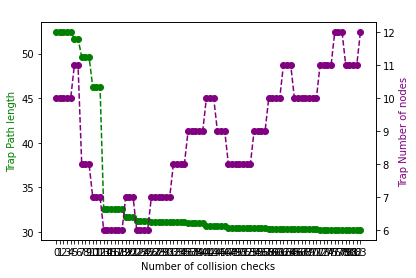

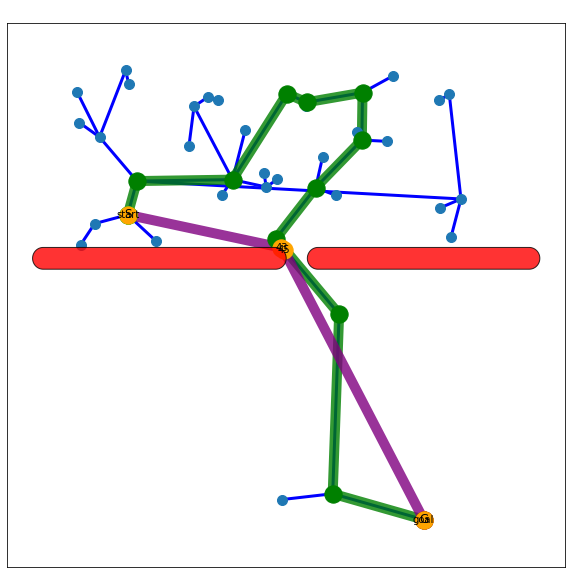

Step: 15
total steps: 1
n step: 1
n: 0
k: 3
simpleRRT
Initial Path: ['start', 1, 12, 40, 52, 54, 58, 'goal']
i: 5
length of path: 8
k_prev: 12
Centered: 54
k_next: goal
Line collides, No change
total steps: 2
n step: 2
n: 0
k: 2
simpleRRT
Initial Path: ['start', 1, 12, 40, 52, 54, 58, 'goal']
i: 5
length of path: 8
k_prev: 40
Centered: 54
k_next: goal
Line collides, No change
total steps: 3
n step: 3
n: 0
k: 1
simpleRRT
Initial Path: ['start', 1, 12, 40, 52, 54, 58, 'goal']
i: 5
length of path: 8
k_prev: 52
Centered: 54
k_next: 58
Deleted Nodes: [54]
new path creation, new path: ['start', 1, 12, 40, 52, 58, 'goal']
total steps: 4
n step: 1
n: 1
k: 3
simpleRRT
Initial Path: ['start', 1, 12, 40, 52, 58, 'goal']
i: 3
length of path: 7
k_prev: start
Centered: 40
k_next: goal
Line collides, No change
total steps: 5
n step: 2
n: 1
k: 2
simpleRRT
Initial Path: ['start', 1, 12, 40, 52, 58, 'goal']
i: 3
length of path: 7
k_prev: 1
Centered: 40
k_next: 58
Line collides, No change
total steps: 6


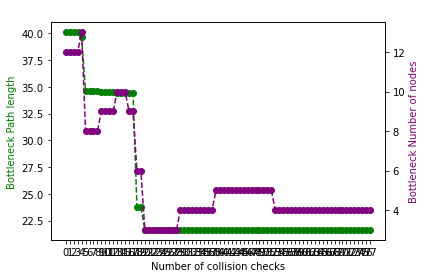

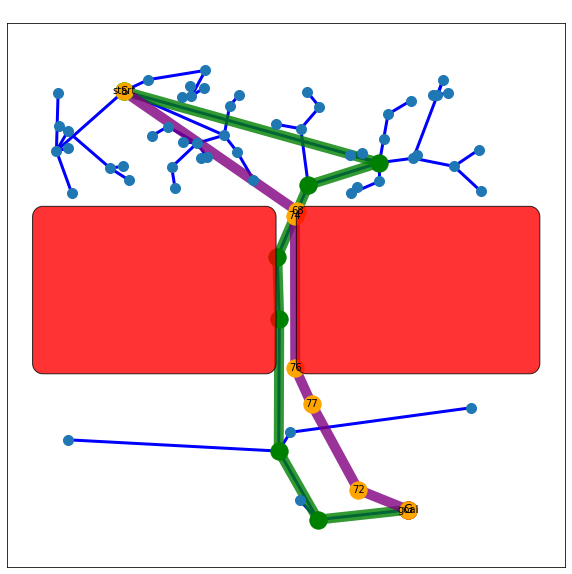

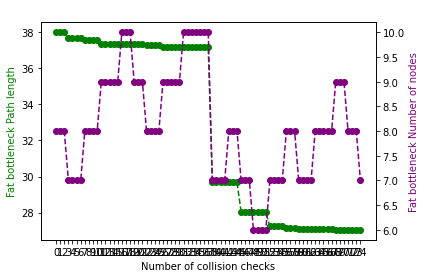

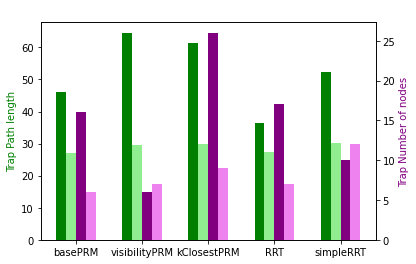

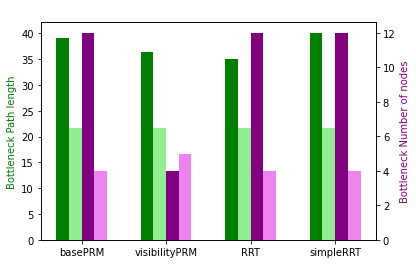

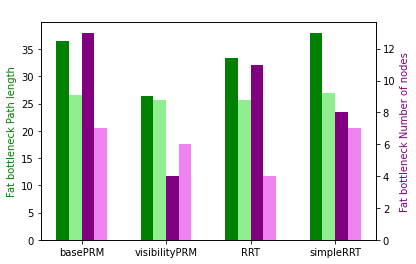

In [38]:
from IPSmoothing import IPSmoothing
k = 3 # Parameter for smoothing
eps = 0.1 # Cancel threshold for DelTree
debug_counter = 0
variance_steps = 10

for result in resultList:
    debug_counter += 1
    print(f"Step: {debug_counter}")

    smoother = IPSmoothing(result, plannerFactory) #=======Added planner factory for iterative plotting functionality Remove

    smoothed_graph = smoother.smooth_solution(k, eps, variance_steps)

    if smoothed_graph is not None:
        smoother.visualize_path(plannerFactory, smoothed_graph, debug_counter) #==========Added Debug Counter
        smoother.draw_statistics()

    # break  #====================================Remove

IPSmoothing.draw_comparison(IPTestSuite.benchList[0:3])





In [34]:
print(IPSmoothing.statistics)

[{'benchmark_name': 'Trap', 'planner_name': 'basePRM', 'original_length': 46.06054114566662, 'original_size': 16, 'smoothed_length': 26.957063505844765, 'smoothed_size': 6, 'length_history': [46.06054114566662, 46.06054114566662, 46.06054114566662, 46.031215771315175, 46.031215771315175, 42.284239777087365, 42.284239777087365, 42.284239777087365, 41.96456873628203, 37.696661245918854, 37.696661245918854, 37.696661245918854, 36.52740619930069, 36.52740619930069, 36.52740619930069, 36.52740619930069, 36.52740619930069, 36.2848034180387, 36.2848034180387, 31.7392051022071, 31.7392051022071, 31.7392051022071, 31.7392051022071, 31.7392051022071, 31.7392051022071, 31.7392051022071, 31.7392051022071, 31.7392051022071, 31.7392051022071, 30.890141714893346, 30.890141714893346, 30.890141714893346, 30.511018675736693, 30.511018675736693, 30.511018675736693, 30.511018675736693, 28.50578474076532, 28.50578474076532, 28.50578474076532, 28.50578474076532, 28.337980460640686, 28.337980460640686, 28.33

In [36]:
print(len(IPSmoothing.statistics[0]['size_history']))

71
